In [1]:
pip install tensorflow

  Using cached flatbuffers-2.0-py2.py3-none-any.whl (26 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached rsa-4.8-py3-none-any.whl (39 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=d3628b2e4fce87e6aa8f56a6091dc9e49552acd14eac3946540f78ef21bfd094
  Stored in directory: c:\users\nipun\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b

2.8.0
Found 3538 images belonging to 2 classes.
Found 250 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (No

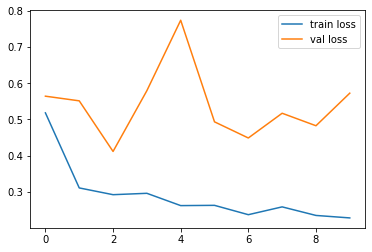

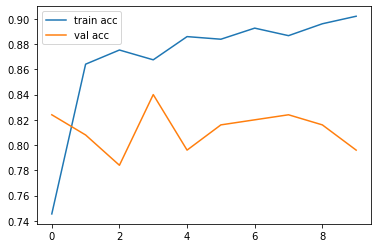

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                    

<Figure size 432x288 with 0 Axes>

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from keras.layers import Dropout
from tensorflow.keras.applications import resnet

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 1
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
# Convolutional Neural Network

# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        rotation_range=260,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='reflect',
        validation_split=0.2
    )
training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(
        rescale=1. / 255,
        rotation_range=260,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='reflect',
        validation_split=0.2
    )
test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

from tensorflow.keras.layers import Dense
# Part 2 - Building the CNN
# Initialising the CNN
cnn = tf.keras.models.Sequential()
# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, padding="same", kernel_size=3, activation='relu', strides=2,
                               input_shape=[64, 64, 3]))
cnn.add(Dropout(0.2))
# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, padding='same', kernel_size=3, activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(Dropout(0.2))
# Step 5 - Output Layer
## For Binary Classification
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='linear'))

cnn.summary()

# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer='adam', loss='hinge', metrics=['accuracy'])


# Training the CNN on the Training set and evaluating it on the Test set
r = cnn.fit(x=training_set, validation_data=test_set, steps_per_epoch = 100, epochs=10)
# plot the loss
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# save it as a h5 file
cnn.save('model_r breastcancer.h5')
from tensorflow.keras.models import load_model

# load model
model = load_model('model_r breastcancer.h5')
model.summary()
ypred = []
# Part 4 - Making a single prediction
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('Datasets/Test/0/10261_idx5_x351_y451_class0.png', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = test_image / 255
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image)
print(result)
if result[0] < 0:
    print("The image classified is not breast cancer")
else:
    print("The image classified is breast cancer")
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image

test_image = image.load_img('Datasets/Test/1/10261_idx5_x1851_y1051_class1.png', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = test_image / 255
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image)
print(result)

if result[0] < 0:
    print("The image classified is not breast cancer")
else:
    print("The image classified is breast cancer")

